# Decision Trees for Big Data Analytics

*Wannes Meert, Hendrik Blockeel, KU Leuven, 2023*

Examples based on [KU Leuven course Machine Learning and Inductive Inference (Hendrik Blockeel)](https://onderwijsaanbod.kuleuven.be/syllabi/e/H02C1AE.htm#activetab=doelstellingen_idp50160), [scikit-learn documentation](https://scikit-learn.org/stable/index.html), [pandas documentation](http://pandas.pydata.org), and [LearningX examples](https://github.com/ankonzoid/LearningX).

## Part 2: Decision Trees and How To Learn Them -- Regression Trees

### Setup

Set the path where the notebooks are located. If the printed path is incorrect, change the code.

In [2]:
import sys
if 'google.colab' in sys.modules:
    !git clone https://github.com/wannesm/KTU_Notebooks

In [1]:
from pathlib import Path
nb_path_options = [Path("."), Path(".") / "KTU_Notebooks"]
nb_path = None
for nb_path_option  in nb_path_options:
    test_path = nb_path_option / "rsrc" / "drinks.csv"
    if test_path.exists():
        nb_path = nb_path_option
        continue
if nb_path is None or not nb_path.exists():
      print("Path to notebooks not found")
else:
      print(f"Path to notebooks: {nb_path.absolute()}")

Path to notebooks: /Users/wannes/Nextcloud/Documents/Events/2023/2023-KTU-BigDataSchool/KTU_BigDataSchool_Meert_Exercises/KTU_Notebooks


In [2]:
from IPython.display import Image

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Learning a Regression Tree

Building a regression tree is similar to a classification tree. The only differences are that you should use the `DecissionTreeRegression` class and that the target values are continuous.

In [5]:
from sklearn.tree import DecisionTreeRegressor

We will use a timeseries example data set:

In [6]:
np.random.seed(1)
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
y = (X * np.sin(X)).ravel()
dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

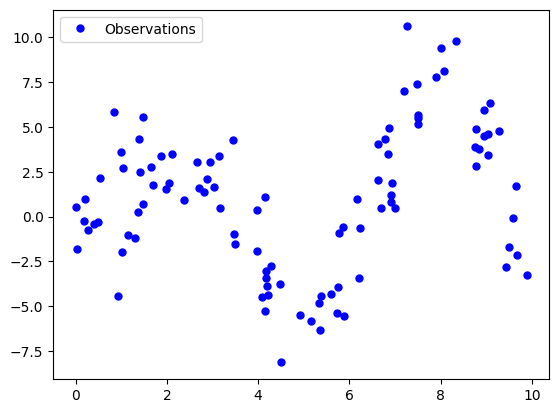

In [7]:
plt.plot(X, y, 'b.', markersize=10, label='Observations');
plt.legend();

In [10]:
clf = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, criterion='friedman_mse')
clf.fit(X, y);

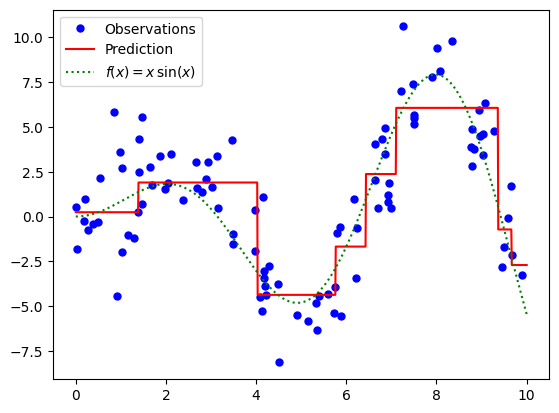

In [11]:
x_int = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred = clf.predict(x_int)
plt.plot(X, y, 'b.', markersize=10, label='Observations');
plt.plot(x_int, y_pred, 'r-', label='Prediction');
plt.plot(x_int, x_int * np.sin(x_int), 'g:', label=r'$f(x) = x\,\sin(x)$')
plt.legend(loc='upper left');

### Optional: Learning a Model Tree

For learning a model tree, we're using a separate toolbox because this is not (yet) implemented in scikit-learn:

https://github.com/ankonzoid/LearningX/tree/master/advanced_ML/model_tree

Download the zip-file in the ``rsrc`` directory or run the following code:

In [12]:
import subprocess as sp
import sys

In [13]:
rsrc_path = nb_path / "rsrc"
learningx_path = rsrc_path / "LearningX"
sp.run(["git", "clone", "https://github.com/ankonzoid/LearningX.git", "LearningX"], cwd=rsrc_path)

fatal: destination path 'LearningX' already exists and is not an empty directory.


CompletedProcess(args=['git', 'clone', 'https://github.com/ankonzoid/LearningX.git', 'LearningX'], returncode=128)

In [14]:
modeltree_path = learningx_path / "advanced_ML" / "model_tree" / "src"
if not modeltree_path.exists():
    print(f"Path not found: {modeltree_path.canonical()}")
models_path = learningx_path / "advanced_ML" / "model_tree" / "models"
data_path = learningx_path / "advanced_ML" / "model_tree" / "data"

sys.path.append(str(modeltree_path))
sys.path.append(str(models_path))

from ModelTree import ModelTree
from linear_regr import linear_regr
from mean_regr import mean_regr

In [15]:
data_clf = pd.read_csv(data_path / "data_clf.csv")
data_clf.head()

,x1,x2,x3,x4,y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
X = data_clf[["x1", "x2", "x3"]].values
y = data_clf["y"].values

In [20]:
model = linear_regr()
model_tree = ModelTree(model, max_depth=4, min_samples_leaf=10,
                       search_type="greedy", n_search_grid=100)

In [21]:
model_tree.fit(X, y, verbose=True)

 max_depth=4, min_samples_leaf=10, search_type=greedy...
 node 0 @ depth 0: loss=0.033374, j_feature=0, threshold=0.324440, N=(659,713)
  node 1 @ depth 1: loss=0.021402, j_feature=1, threshold=5.833300, N=(522,137)
    node 3 @ depth 2: loss=0.014605, j_feature=2, threshold=3.014100, N=(306,216)
      *leaf 5 @ depth 3: loss=0.000000, N=306
      node 6 @ depth 3: loss=0.018959, j_feature=1, threshold=-4.742800, N=(179,37)
        *leaf 7 @ depth 4: loss=0.005009, N=179
        *leaf 8 @ depth 4: loss=0.019734, N=37
    node 4 @ depth 2: loss=0.014689, j_feature=0, threshold=-4.147900, N=(40,97)
      node 9 @ depth 3: loss=0.002699, j_feature=1, threshold=8.181900, N=(25,15)
        *leaf 11 @ depth 4: loss=0.000000, N=25
        *leaf 12 @ depth 4: loss=0.000888, N=15
      *leaf 10 @ depth 3: loss=0.000000, N=97
  node 2 @ depth 1: loss=0.023332, j_feature=2, threshold=0.183070, N=(362,351)
    node 13 @ depth 2: loss=0.013752, j_feature=1, threshold=5.202200, N=(103,259)
      nod

Saving model tree diagram to 'rsrc/model_tree.png'...


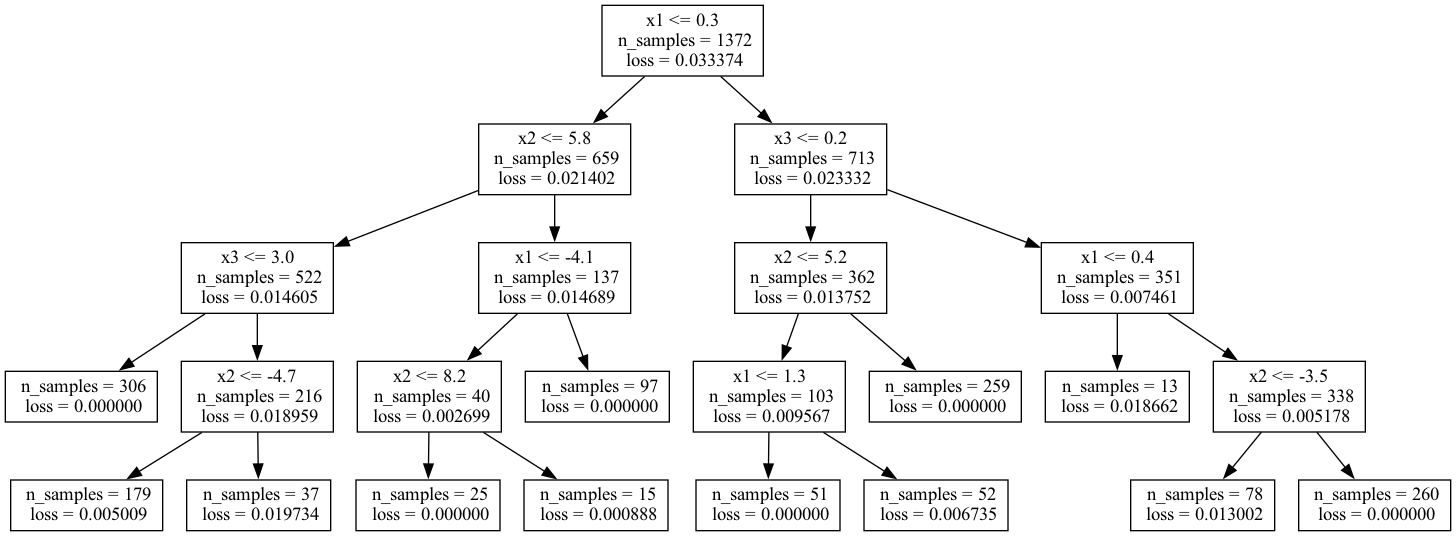

In [22]:
model_tree.export_graphviz(str(rsrc_path / "model_tree"),
                           list(data_clf.columns.values),
                           export_png=True, export_pdf=False)
Image(str(rsrc_path / "model_tree.png"))

### Optional: Learning a Model Tree on time series

In [23]:
poly_data = pd.read_csv(data_path / "data_poly4_regr.csv")
poly_data.head()

,x1,y
0,0.00000,256.000000
1,0.02004,248.363878
2,0.04008,240.845619
3,0.06012,233.444215
4,0.08016,226.158662


In [24]:
X = poly_data["x1"].values.reshape(-1, 1)
y = poly_data["y"].values.reshape(-1, 1)

You can switch between linear regression and mean regression for the leafs. And play with max depth to change how close the model fits the data.

In [25]:
model = linear_regr()
# model = mean_regr()
model_tree = ModelTree(model, max_depth=3, min_samples_leaf=10,
                       search_type="greedy", n_search_grid=100)
model_tree.fit(X, y, verbose=True)

 max_depth=3, min_samples_leaf=10, search_type=greedy...
 node 0 @ depth 0: loss=3806.521476, j_feature=0, threshold=1.262525, N=(64,436)
  node 1 @ depth 1: loss=185.448065, j_feature=0, threshold=0.581162, N=(30,34)
    node 3 @ depth 2: loss=12.256338, j_feature=0, threshold=0.280561, N=(15,15)
      *leaf 5 @ depth 3: loss=0.860828, N=15
      *leaf 6 @ depth 3: loss=0.653933, N=15
    node 4 @ depth 2: loss=10.680416, j_feature=0, threshold=0.901804, N=(16,18)
      *leaf 7 @ depth 3: loss=0.623681, N=16
      *leaf 8 @ depth 3: loss=0.691203, N=18
  node 2 @ depth 1: loss=1159.714711, j_feature=0, threshold=7.494990, N=(311,125)
    node 9 @ depth 2: loss=477.449421, j_feature=0, threshold=5.611222, N=(217,94)
      *leaf 11 @ depth 3: loss=204.487095, N=217
      *leaf 12 @ depth 3: loss=3.191131, N=94
    node 10 @ depth 2: loss=747.621580, j_feature=0, threshold=8.957916, N=(73,52)
      *leaf 13 @ depth 3: loss=34.548078, N=73
      *leaf 14 @ depth 3: loss=53.892333, N=52


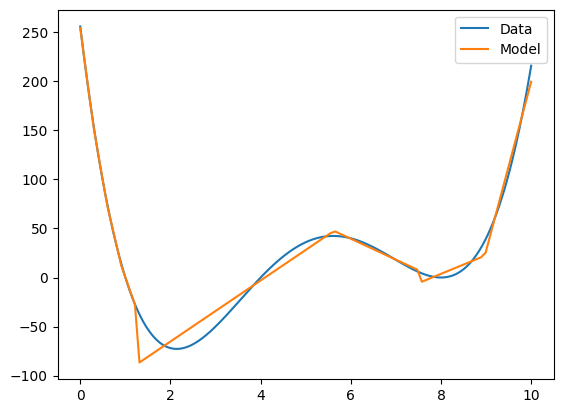

In [26]:
x_int = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model_tree.predict(x_int)
plt.plot(X, y, label="Data")
plt.plot(x_int, y_pred, label="Model");
plt.legend();